In [420]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [421]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep=";")
data = data[data["total sulfur dioxide"] < 200]
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [422]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000
mean,8.320163,0.528106,0.270463,2.531590,0.087513,15.847840,46.170946,0.996751,3.311490,0.658334,10.420632,5.634314
std,1.742123,0.178990,0.194384,1.395974,0.047076,10.438642,31.826498,0.001884,0.154115,0.169532,1.064260,0.806630
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997840,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [423]:
labels_column = "residual sugar"
cols_4_zscore = (data.keys()).drop(labels_column)

data[cols_4_zscore] = data[cols_4_zscore].apply(stats.zscore)

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03
mean,3.559388e-17,1.245786e-16,1.779694e-17,2.531590,-1.423755e-16,8.898469e-18,-5.339081e-17,-8.361001e-14,3.025479e-16,8.898469e-17,-5.695020e-16,4.182280e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.395974,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.136087e+00,-2.280762e+00,-1.391823e+00,0.900000,-1.604575e+00,-1.422837e+00,-1.262581e+00,-3.546932e+00,-3.709380e+00,-1.937318e+00,-1.899221e+00,-3.266852e+00
25%,-7.006076e-01,-7.718255e-01,-9.286769e-01,1.900000,-3.721412e-01,-8.478700e-01,-7.596977e-01,-6.111392e-01,-6.587444e-01,-6.392206e-01,-8.653154e-01,-7.866225e-01
50%,-2.412541e-01,-4.530063e-02,-5.384522e-02,2.200000,-1.809014e-01,-1.770746e-01,-2.568145e-01,-6.216372e-04,-9.673073e-03,-2.261897e-01,-2.073755e-01,4.534922e-01
75%,5.051954e-01,6.253377e-01,7.695258e-01,2.600000,5.283609e-02,4.937208e-01,4.975104e-01,5.780428e-01,5.744912e-01,4.228588e-01,6.385471e-01,4.534922e-01
max,4.352281e+00,5.878672e+00,3.754246e+00,15.500000,1.112349e+01,5.380944e+00,3.734821e+00,3.683719e+00,4.533826e+00,7.916418e+00,4.210221e+00,2.933721e+00


In [424]:
data_tensor = torch.tensor(data[cols_4_zscore].values).float()
labels_tensor = torch.tensor(data[labels_column].values).float()

print(data_tensor.shape)
print(labels_tensor.shape)

torch.Size([1597, 11])
torch.Size([1597])


In [425]:
labels_tensor = labels_tensor[:, None]
print(labels_tensor.shape)

torch.Size([1597, 1])


In [426]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data_tensor,
    labels_tensor,
    test_size=.1,
    shuffle=True
)

train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

test_data_size = test_dataset.tensors[0].shape[0]
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    drop_last=True
)
test_loader = DataLoader(
    test_dataset,
    batch_size=test_data_size
)

In [427]:
class ModelWines(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(11, 16)
        self.bn1 = nn.BatchNorm1d(16)
        self.fc1 = nn.Linear(16, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc2 = nn.Linear(32, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = f.relu(self.input(x))
        x = self.bn1(x)
        x = f.relu(self.fc1(x))
        x = self.bn2(x)
        x = f.relu(self.fc2(x))
        x = self.bn3(x)

        return self.output(x)

In [428]:
def train_model(model, epochs):
    train_losses = []
    test_losses = []

    model = model
    loss_func = nn.MSELoss().to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=.01)

    for _ in range(epochs):
        model.train()

        loss = 0.
        for X, y in train_loader:
            X = X.to(device)
            y = y.to(device)

            preds = model(X)
            loss = loss_func(preds, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        train_losses.append(loss.item())

        X, y = next(iter(test_loader))
        X = X.to(device)
        y = y.to(device)

        model.eval()
        with torch.no_grad():
            preds = model(X)

        test_losses.append(loss_func(preds, y).item())

    return train_losses, test_losses

In [429]:
epochs = 1000
model = ModelWines().to(device)

train_losses, test_losses = train_model(model, epochs)

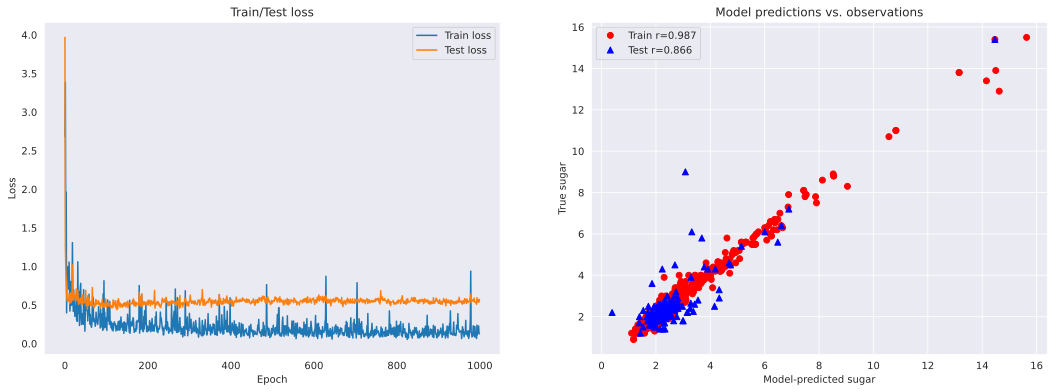

In [430]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(train_losses, label="Train loss")
ax[0].plot(test_losses, label="Test loss")
ax[0].set_title("Train/Test loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].grid()

preds_train = model(train_data.to(device))
preds_train = (preds_train.to("cpu")).detach()
preds_test = model(test_data.to(device))
preds_test = (preds_test.to("cpu")).detach()

ax[1].plot(preds_train, train_labels, "ro")
ax[1].plot(preds_test, test_labels, "b^")
ax[1].set_xlabel("Model-predicted sugar")
ax[1].set_ylabel("True sugar")
ax[1].set_title("Model predictions vs. observations")

corr_train = np.corrcoef(preds_train.T, train_labels.T)[1, 0]
corr_test = np.corrcoef(preds_test.T, test_labels.T)[1, 0]
ax[1].legend([f"Train r={corr_train:.3f}", f"Test r={corr_test:.3f}"])

plt.show()

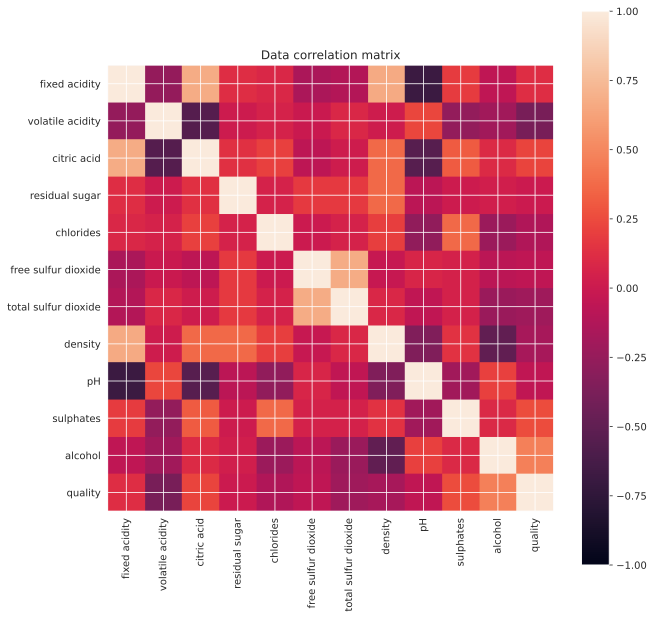

In [435]:
fig = plt.figure(figsize=(10, 10))

plt.imshow(np.corrcoef(data.T), vmin=-1, vmax=1)
plt.xticks(range(len(data.keys())), labels=data.keys(), rotation=90)
plt.yticks(range(len(data.keys())), labels=data.keys())
plt.colorbar()
plt.title('Data correlation matrix')
plt.show()